In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
all_data=pd.read_csv("3_pre_processed_data.csv")
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int32')
all_data['Price Each']=pd.to_numeric(all_data['Price Each']) #Make float
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Q5 : What product sold the most? Why do you think it sold the most ?

In [2]:
product_group=all_data.groupby('Product')

In [3]:
product_group.sum()

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
Product,,,,,,,
20in Monitor,950889651,4129,451068.99,04/02/19 04:0004/29/19 14:4004/10/19 08:1704/0...,"765 Cherry St, Seattle, WA 98101804 Church St,...",29336,454148.71
27in 4K Gaming Monitor,1442588628,6244,2429637.70,04/16/19 19:2304/30/19 15:5404/11/19 00:3904/0...,"657 Hill St, Dallas, TX 7500187 West St, Bosto...",44440,2435097.56
27in FHD Monitor,1724223743,7550,1125974.93,04/29/19 19:3804/20/19 23:5104/24/19 01:1704/0...,"557 5th St, Los Angeles, CA 90001807 12th St, ...",52558,1132424.50
34in Ultrawide Monitor,1418985948,6199,2348718.19,04/05/19 12:4604/01/19 11:5004/23/19 22:5304/0...,"678 Hickory St, Portland, OR 97035661 Washingt...",43304,2355558.01
AA Batteries (4-pack),4744173938,27635,79015.68,04/22/19 15:0904/11/19 10:2304/07/19 21:0104/1...,"186 12th St, Dallas, TX 75001886 Jefferson St,...",145558,106118.40
AAA Batteries (4-pack),4764959472,31017,61716.59,04/27/19 00:3004/20/19 12:0004/10/19 17:0004/2...,"433 Hill St, New York City, NY 10001146 Jackso...",146370,92740.83
Apple Airpods Headphones,3579120098,15661,2332350.00,04/04/19 20:3004/28/19 11:4204/04/19 19:2504/0...,"149 Dogwood St, New York City, NY 10001771 Rid...",109477,2349150.00
Bose SoundSport Headphones,3071496156,13457,1332366.75,04/07/19 22:3004/02/19 07:4604/27/19 12:2004/0...,"682 Chestnut St, Boston, MA 02215668 Center St...",94113,1345565.43
Flatscreen TV,1110943207,4819,1440000.00,04/24/19 20:3904/16/19 18:3704/20/19 18:2504/3...,"936 Church St, San Francisco, CA 94016116 Nort...",34224,1445700.00


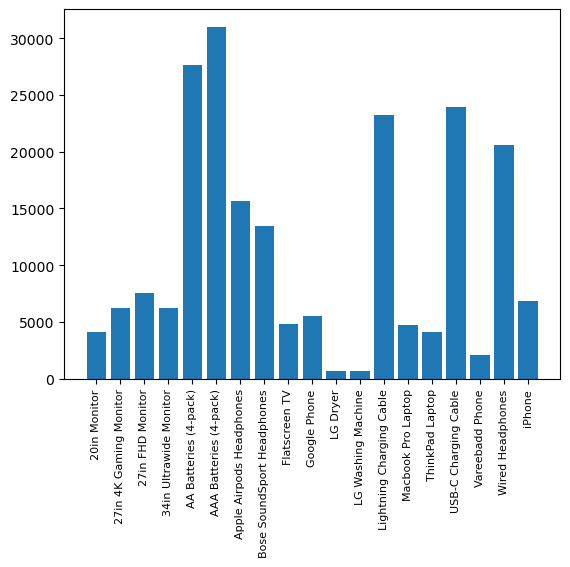

In [4]:
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
plt.bar(products,quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.show()

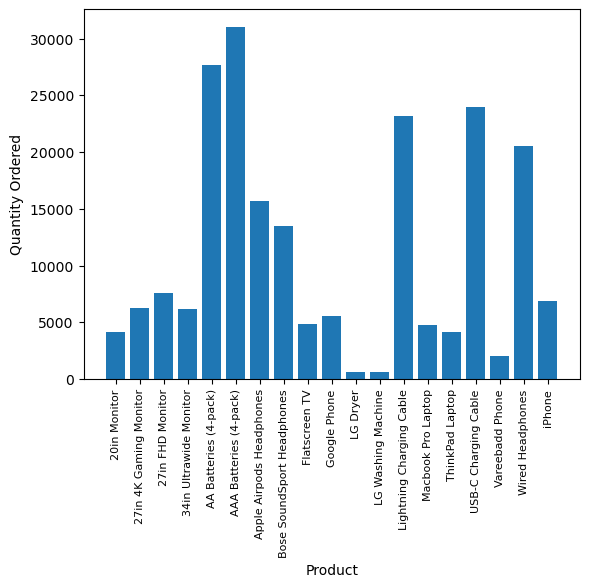

In [5]:
plt.bar(products,quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

In [ ]:
## I think the batteries are used in all electronic gadgets, for that reason it was being sold most.